<a href="https://colab.research.google.com/github/sachhinrao3/Projects_on_CNN/blob/main/Cifar10_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project I have used a **Cifar10** dataset and build a **CNN model** for prediction the class of image.

I have used 2 ways to build an CNN model, first one by **normal approch** and in second approach is used a **data augmentation technique**  with the help of **ImageDataGenerator** and compare the performance for both the cases.

In [31]:
ls

sample_data/


In [18]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, Dense, Dropout, BatchNormalization 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Load the dataset
cifar10 = cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


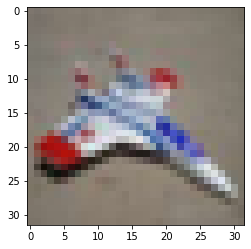

In [4]:
plt.imshow(x_train[30])

Require shape for all type of x dataset (color as well as for greyscale) is: **N * H * W * C** . Which is true in our case.

We also need to scale our data

In [5]:
print(x_train.shape, x_test.shape)  

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [6]:
print(y_train.shape) # We need its shape must be in 1D. We can change 2D to 1D with the help of flatten() method

(50000, 1)


Since the targets are 2D array N x 1 instead of N. Therefore, we need to **flatten** it.

In [7]:
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten the shape of the dataset -> From 2D to 1D
print(y_train.shape)

(50000,)


In [8]:
# No. of classes
K = len(set(y_train))
print('Number od classes:', K)

Number od classes: 10



Build the Model using the **functional API.**

In [16]:
# Build a model and also apply hyperparameter
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)                    # We can use flatten method also because all images in the dataset have same size
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Compile the model
model.compile(
              optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [13]:
# Fit the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=1000)

Epoch 1/50
50/50 [==============================] - 3s 59ms/step - loss: 2.2316 - accuracy: 0.3628 - val_loss: 2.2712 - val_accuracy: 0.1089
Epoch 2/50
50/50 [==============================] - 3s 55ms/step - loss: 1.3000 - accuracy: 0.5376 - val_loss: 1.7455 - val_accuracy: 0.3887
Epoch 3/50
50/50 [==============================] - 3s 55ms/step - loss: 1.0691 - accuracy: 0.6246 - val_loss: 1.1548 - val_accuracy: 0.5902
Epoch 4/50
50/50 [==============================] - 3s 55ms/step - loss: 0.9083 - accuracy: 0.6818 - val_loss: 0.9991 - val_accuracy: 0.6492
Epoch 5/50
50/50 [==============================] - 3s 55ms/step - loss: 0.7792 - accuracy: 0.7301 - val_loss: 0.8907 - val_accuracy: 0.6886
Epoch 6/50
50/50 [==============================] - 3s 55ms/step - loss: 0.6850 - accuracy: 0.7625 - val_loss: 0.7978 - val_accuracy: 0.7210
Epoch 7/50
50/50 [==============================] - 3s 55ms/step - loss: 0.5917 - accuracy: 0.7942 - val_loss: 0.8281 - val_accuracy: 0.7197
Epoch 8/50
50

**Observations:** Here we can see our accuracy is **98%** and validation accuracy as **80%**. So, it's a case of **Overfitting**.


Plot the Loss and Score as per iteration.

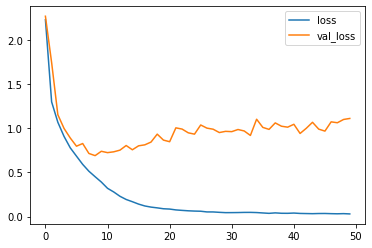

In [14]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

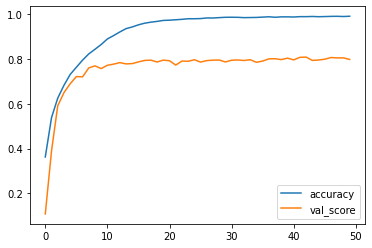

In [15]:
# plot the score per iterations
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_score')
plt.legend();

### Fit data using ***Data Augmentation Technique***.

**NOTE:** If you run it **AFTER** calling the previous model.fit() method, it will **CONTINUE** training where it left off

In [19]:
# Fit with data augmentation
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range= 0.1, height_shift_range= 0.1, horizontal_flip= True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epochs = x_train.shape[0]//batch_size 

r = model.fit_generator(train_generator, validation_data= (x_test, y_test), steps_per_epoch= steps_per_epochs, epochs = 50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1562/1562 [==============================] - 21s 13ms/step - loss: 1.4605 - accuracy: 0.4924 - val_loss: 1.2311 - val_accuracy: 0.5811
Epoch 2/50
1562/1562 [==============================] - 21s 13ms/step - loss: 1.0117 - accuracy: 0.6467 - val_loss: 0.8451 - val_accuracy: 0.7106
Epoch 3/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.8518 - accuracy: 0.7070 - val_loss: 0.8805 - val_accuracy: 0.7030
Epoch 4/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.7617 - accuracy: 0.7382 - val_loss: 0.8180 - val_accuracy: 0.7308
Epoch 5/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.6939 - accuracy: 0.7637 - val_loss: 0.7029 - val_accuracy: 0.7546
Epoch 6/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.6428 - accuracy: 0.7820 - val_loss: 0.6466 - val_accuracy: 0.7714
Epoch 7/50
1562/1562 [==========================

**Observations:** We are getting a lower training accuracy but a higher Validation accuracy then previous model. Hence, there is lesser Overfitting. Therefore, the model has **improved**.

In [28]:
## Summary of our model
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

Plot the **Accuracy score** and **Loss** per iteration

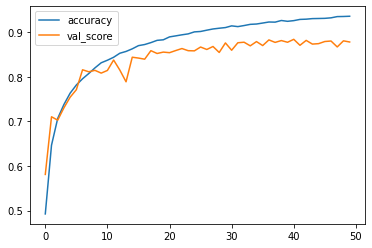

In [21]:
# plot the score per iterations
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_score')
plt.legend();

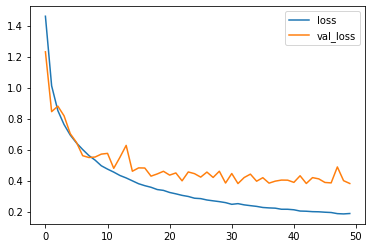

In [20]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

Confusion matrix, without normalization
[[886   9  33   7   3   3   9  10  26  14]
 [  3 963   0   3   1   0   4   0   3  23]
 [ 19   0 862  26  17  18  42  10   3   3]
 [  6   2  40 748  19  87  64  22   4   8]
 [  4   0  42  37 820  22  45  27   2   1]
 [  4   0  26 105  22 793  28  21   0   1]
 [  1   1  21  17   2   3 953   1   0   1]
 [  8   1  13  16  12  20   4 921   1   4]
 [ 30  15   5   5   1   1   7   1 909  26]
 [  9  36   7   5   1   1   4   2   4 931]]


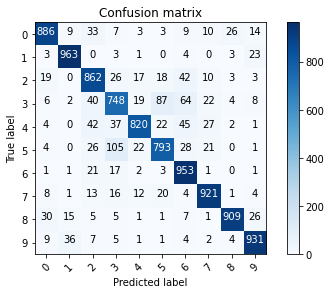

In [22]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


Observations: As we can check misclassified classes with the help of confusion matrix:

Label 5 is miclassified as label 3 i.e., Dog is misclassified as cat in around **105** images.

and label 3 is also misclassified as 5 i.e., Cat is misclassified as dog in 87 images.


In [23]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

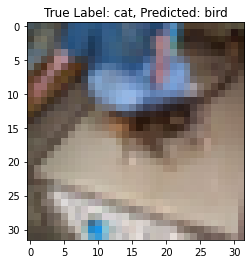

In [24]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True Label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

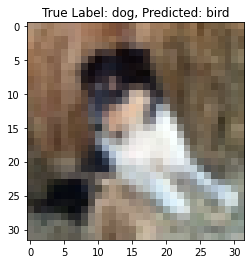

In [27]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True Label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

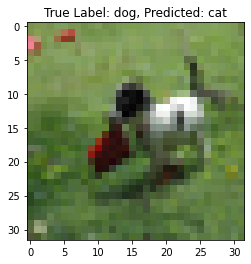

In [26]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True Label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
model.save()